# STEP 1 : Loading Data
#The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.

x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .

y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.

In [1]:
from keras.datasets import mnist
#The MNIST database (Modified National Institute of Standards and Technology database)
#It is a large database of handwritten digits that is commonly used for training various image processing systems.
#The database is also widely used for training and testing in the field of machine learning.


Using TensorFlow backend.


In [43]:
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
#images are stored in numpy arrays
#labels are arrays of digits.

In [44]:
train_images.shape
#a shape (60000,28,28) means an array or tensor with 3 dimensions. 
#It containing 60000 elements in the first dimension.
#28 in the second.
#28 in the third.
#totaling 60000*28*28 = 42000000 elements or numbers.

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# STEP 2 : BUILD NEURAL NETWORK MODEL

In [27]:
from keras import models
from keras import layers #list of the layers comprising the model.
network=models.Sequential() #The sequential API allows you to create models layer-by-layer for most problems. 
#It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))#Dense means fully conneected layers.
#The rectified linear activation function is a piecewise linear function.
#that will output the input directly if is positive.
#otherwise, it will output zero.
#NN learn from activation parameter.

network.add(layers.Dense(10, activation='softmax'))

# STEP 3 : COMPILATION

In [11]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
#Compile:Configures the network for training.
#Optimizer:The mechanism through which the network will update itself based on the data it se and its loss function.
#Loss:Network will be able to measure its performance on the training data, will be able to steer in right direction.
#Metrics:To monitor(judge the performance of your model) during training and testing(accuracy)


# STEP 4 : DATA PREPROCESSING
We have to scale x_train and x_test so that all values are in the [0, 1] interval. Why do we need to scale ? goal of scaling is to speed up the algorithm's computation . It is used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. It is also required for some algorithms to model the data correctly.

In [40]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255



In [13]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
#Converts intergers to binary matrix.
#converts this into a matrix as many columns as there are classes


# STEP 5 : TRAIN THE MODEL

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#trains the network for a fixed number of epochs(iterations on dataset).

Epoch 1/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.2556 - accuracy: 0.9249
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.1044 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.0681 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0498 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0373 - accuracy: 0.9891


#  STEP 6 : EVALUATE THE TRAINING
Now let’s check that the model performs well on the test set, too:

In [15]:
test_loss, test_acc=network.evaluate(test_images,test_labels)
#input data, target data.
print("test_acc:",test_acc)
print("test loss:",test_loss)

10000/10000 [==============================] - 1s 126us/step
test_acc: 0.9776999950408936
test loss: 0.07897653519342421


# Scalars(0D tensors)

In [16]:
import numpy as np
x=np.array(12)
print(x)
print(x.ndim)

12
0


# Vectors(1D tensors)

In [17]:
x=np.array([12,3,6,14]) #5 entries present so called 5 dimensional vector.
print(x)
print(x.ndim)

[12  3  6 14]
1


# Matrices(2D tensors)

In [18]:
x=np.array([[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]])
print(x)
print(x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2


# 3D tensors

In [19]:
x=np.array([[[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]],
           [[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]],
           [[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]]])
print(x)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]


In [20]:
digit=train_images[4]

TypeError: Invalid shape (784,) for image data

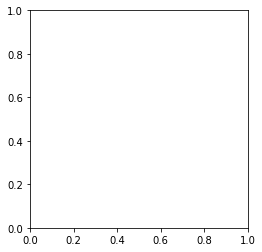

In [45]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
my_slice=train_images[10:100]

In [24]:
my_slice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
my_slice.shape

(90, 784)

In [33]:
my_slice=train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice=train_images[10:100,0:28,0:28]
my_slice.shape #pg#57

(90, 28, 28)

# The notion of databatches

In [35]:
batch=train_images[:128]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [36]:
batch=train_images[128:256]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
batch=train_images[128*n:128*(n+1)]

In [ ]:
def naive_relu(x):
    assert len(x.shape)==2 
    assert x.shape==y.shape
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x        

# Regression Problem
# Cost Function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('weight-height.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf7 in position 0: invalid start byte